# Introduction


Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

# Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import us

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv(
    'Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv(
    'Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv(
    'Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv(
    'Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"Shape of dataframes are:")
print(
    f"\n\nHouseHold Income DataFrame (df_hh_income) shape:\n(row, columns): {df_hh_income.shape}")
print(
    f"\n\nPoverty DataFrame (df_pct_poverty) shape:\n(row, columns): {df_pct_poverty.shape}")
print(
    f"\n\nHigh School Completion DataFrame (df_pct_completed_hs) shape:\n(row, columns): {df_pct_completed_hs.shape}")
print(
    f"\n\nShare of city by Race DateFrame (df_share_race_city):\n(row, columns): {df_share_race_city.shape}")
print(
    f"\n\nDeath by Police DataFrame (df_fatalities):\n(row, columns): {df_fatalities.shape}")

Shape of dataframes are:


HouseHold Income DataFrame (df_hh_income) shape:
(row, columns): (29322, 3)


Poverty DataFrame (df_pct_poverty) shape:
(row, columns): (29329, 3)


High School Completion DataFrame (df_pct_completed_hs) shape:
(row, columns): (29329, 3)


Share of city by Race DateFrame (df_share_race_city):
(row, columns): (29268, 7)


Death by Police DataFrame (df_fatalities):
(row, columns): (2535, 14)


In [5]:
print("Column Names of DataFrames are:")
print(
    f"\n\nHouseHold Income DataFrame (df_hh_income) columns:\n {df_hh_income.columns}")
print(
    f"\n\nPoverty DataFrame (df_pct_poverty) columns:\n {df_pct_poverty.columns}")
print(
    f"\n\nHigh School Completion DataFrame (df_pct_completed_hs) columns:\n {df_pct_completed_hs.columns}")
print(
    f"\n\nShare of city by Race DataFrame (df_share_race_city):\n {df_share_race_city.columns}")
print(
    f"\n\nDeath by Police DataFrame (df_fatalities):\n {df_fatalities.columns}")

Column Names of DataFrames are:


HouseHold Income DataFrame (df_hh_income) columns:
 Index(['Geographic Area', 'City', 'Median Income'], dtype='object')


Poverty DataFrame (df_pct_poverty) columns:
 Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


High School Completion DataFrame (df_pct_completed_hs) columns:
 Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')


Share of city by Race DataFrame (df_share_race_city):
 Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


Death by Police DataFrame (df_fatalities):
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [6]:
print("Calculating NaN values in each DataFrame:")
print(
    f"\n\nHouseHold Income DataFrame (df_hh_income) NaN values:\n{df_hh_income.isna().sum()}")
print(
    f"\n\nPoverty DataFrame (df_pct_poverty) NaN values:\n{df_pct_poverty.isna().sum()}")
print(
    f"\n\nHigh School Completion DataFrame (df_pct_completed_hs) NaN values:\n{df_pct_completed_hs.isna().sum()}")
print(
    f"\n\nShare of City Race DataFrame (df_share_race_city): NanValues:\n{df_share_race_city.isna().sum()}")
print(
    f"\n\nDeath by Police DataFrame (df_fatalities): NanValues:\n{df_fatalities.isna().sum()}")

Calculating NaN values in each DataFrame:


HouseHold Income DataFrame (df_hh_income) NaN values:
Geographic Area     0
City                0
Median Income      51
dtype: int64


Poverty DataFrame (df_pct_poverty) NaN values:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64


High School Completion DataFrame (df_pct_completed_hs) NaN values:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64


Share of City Race DataFrame (df_share_race_city): NanValues:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64


Death by Police DataFrame (df_fatalities): NanValues:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0

In [7]:
print("Calculating Duplicate values in each DataFrame:")
print(
    f"\n\nHouseHold Income DataFrame (df_hh_income) Duplicate values:\n{df_hh_income.duplicated().sum()}")
print(
    f"\n\nPoverty DataFrame (df_pct_poverty) Duplicate values:\n{df_pct_poverty.duplicated().sum()}")
print(
    f"\n\nHigh School Completion DataFrame (df_pct_completed_hs) Duplicate values:\n{df_pct_completed_hs.duplicated().sum()}")
print(
    f"\n\nShare of City Race DataFrame(df_share_race_city) Duplicate values:\n{df_share_race_city.duplicated().sum()}")
print(
    f"\n\nDeath by Police DataFrame (df_fatalities) Duplicate values:\n{df_fatalities.duplicated().sum()}")

Calculating Duplicate values in each DataFrame:


HouseHold Income DataFrame (df_hh_income) Duplicate values:
0


Poverty DataFrame (df_pct_poverty) Duplicate values:
0


High School Completion DataFrame (df_pct_completed_hs) Duplicate values:
0


Share of City Race DataFrame(df_share_race_city) Duplicate values:
0


Death by Police DataFrame (df_fatalities) Duplicate values:
0


## <b style="color: green"> There are no duplicated values. </b>

## <b style="color: orange"> But there are NaN values many places, let's see what we can do about that </b>

In [8]:
# First house hold income
df_hh_income[df_hh_income.isna().any(axis=1)].count()

Geographic Area    51
City               51
Median Income       0
dtype: int64

In [9]:
# Here we can drop NaN values rows because they are the important columns, so we can't fill them with any values
df_hh_income.dropna(inplace=True)
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [10]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [11]:
# Let's deal with df_fatalities
df_fatalities[df_fatalities.isna().any(axis=1)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


### I really don't think we can replace any NaN value with a default value, because it will affect the analysis
### So, I will depending upon the analysis decide what to do with the NaN values


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty = df_pct_poverty.convert_dtypes()
df_pct_poverty = df_pct_poverty[-df_pct_poverty["poverty_rate"].str.contains(
    "-")]
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty["poverty_rate"])
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60
29325,WY,Worland city,15.30
29326,WY,Wright town,5.90
29327,WY,Yoder town,5.40


In [13]:
poverty_by_state = (df_pct_poverty
                    .groupby("Geographic Area")
                    .agg({"poverty_rate": "mean"})
                    .sort_values('poverty_rate')
                    )
poverty_by_state = poverty_by_state.reset_index()
poverty_by_state

,Geographic Area,poverty_rate
0,NJ,8.19
1,CT,9.14
2,MA,9.59
3,WY,9.89
4,MD,10.31
5,RI,10.37
6,NY,11.67
7,UT,11.98
8,ND,12.16
9,IA,12.29


In [14]:
def get_state_name(state_code):
    try:
        state_name = us.states.lookup(state_code).name
    except AttributeError as e:
        print(e)
        state_name = state_code
    return state_name

In [15]:
poverty_by_state["States"] = poverty_by_state["Geographic Area"].apply(
    get_state_name)

'NoneType' object has no attribute 'name'


In [16]:
poverty = px.bar(poverty_by_state, x="States",
                 y="poverty_rate", title="Poverty Rate by State")
poverty.update_layout(xaxis={'categoryorder': 'total descending'},
                      xaxis_title="State", yaxis_title="Poverty Rate")
poverty.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [17]:
df_pct_completed_hs = df_pct_completed_hs.convert_dtypes()
df_pct_completed_hs = df_pct_completed_hs[-df_pct_completed_hs["percent_completed_hs"].str.contains(
    "-")]
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(
    df_pct_completed_hs["percent_completed_hs"])

In [18]:
from webbrowser import get


highschool_by_state = (df_pct_completed_hs
                    .groupby("Geographic Area")
                    .agg({"percent_completed_hs": "mean"})
                    .sort_values("percent_completed_hs")
)
highschool_by_state = highschool_by_state.reset_index()
highschool_by_state['State'] = highschool_by_state["Geographic Area"].apply(get_state_name)
highschool_by_state   

'NoneType' object has no attribute 'name'


,Geographic Area,percent_completed_hs,State
0,TX,75.69,Texas
1,MS,78.47,Mississippi
2,GA,79.01,Georgia
3,LA,79.29,Louisiana
4,AR,79.95,Arkansas
5,AL,80.30,Alabama
6,AZ,80.47,Arizona
7,SC,80.85,South Carolina
8,NM,80.98,New Mexico
9,TN,81.63,Tennessee


In [19]:
highschool_graduation = px.bar(highschool_by_state, x="State", y="percent_completed_hs", title="High School Graduation Rate by State")
highschool_graduation.update_layout(xaxis={'categoryorder': 'total ascending'}, xaxis_title="State", yaxis_title="High School Graduation Rate")
highschool_graduation.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [20]:
import plotly.graph_objects as go

# sorting data
poverty_by_state = poverty_by_state.sort_values('States', ascending=True)
highschool_by_state = highschool_by_state.sort_values('State', ascending=True)

# Assuming df is your DataFrame and it has columns 'us_states', 'poverty_rate', 'graduation_rate'
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=poverty_by_state['States'],
                         y=poverty_by_state['poverty_rate'],
                         name='Poverty Rate',
                         line=dict(color='blue', width=2)
                         )
              )

fig.add_trace(go.Scatter(x=highschool_by_state['State'],
                         y=highschool_by_state['percent_completed_hs'],
                         name='Graduation Rate',
                         yaxis='y2',
                         line=dict(color='green', width=2)))

# Create a layout
fig.update_layout(
    title='Poverty Rate and Graduation Rate by US States',
    xaxis=dict(title='US States'),
    yaxis=dict(title='Poverty Rate (%)'),
    yaxis2=dict(title='Graduation Rate (%)', overlaying='y', side='right', autorange='reversed'),
    autosize=False,
    width=1200,
    height=750,
    margin=dict(l=50, r=50, b=100, t=100, pad=10),
)

# fig.update_yaxes(autorange="reversed", matches="y2")

fig.show()

## <b style="color: orangered"> Almost perfectly matches </b>
### poverty increases the high school graduation rate goes down.
### It can either mean, poverty causes less education or less education causes poverty.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [21]:
df_poverty_graduation = pd.merge(poverty_by_state, highschool_by_state, left_on='States', right_on='State')
df_poverty_graduation = df_poverty_graduation.drop(['State'], axis=1)
df_poverty_graduation = df_poverty_graduation.rename(columns={'States': 'State'})

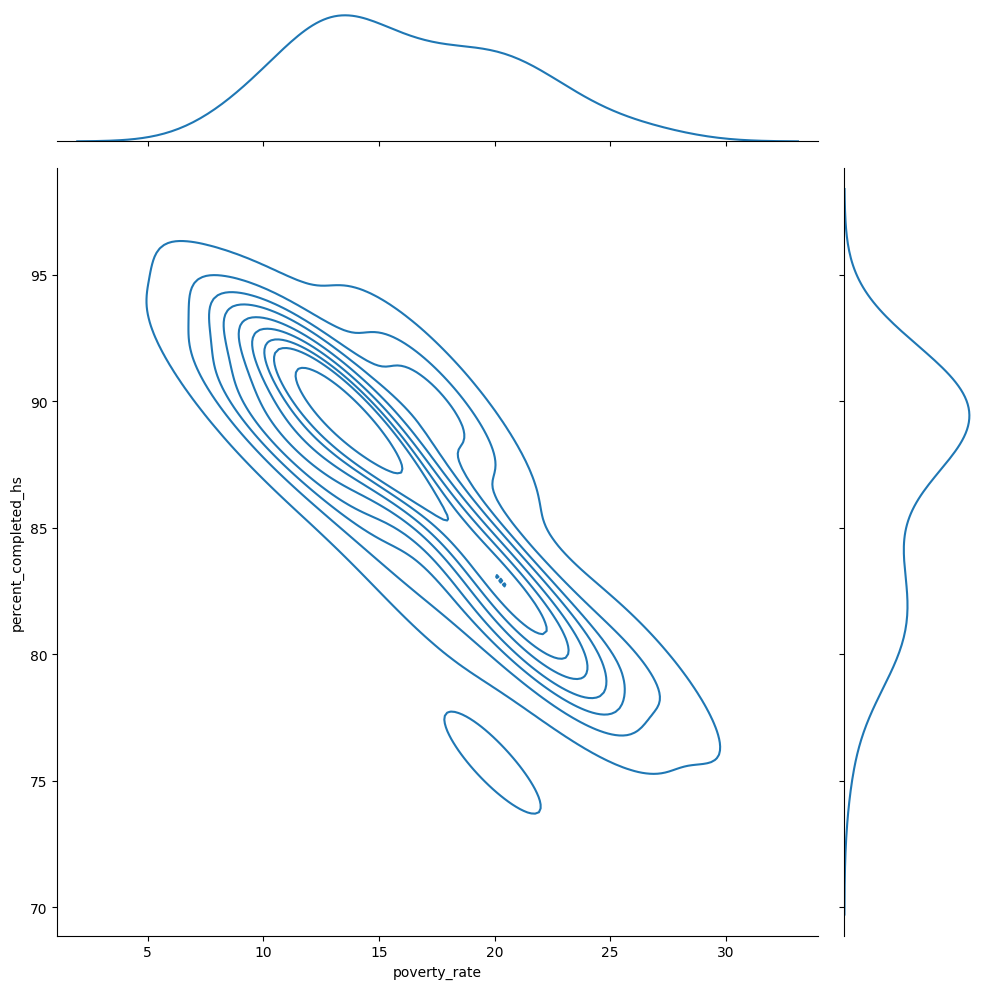

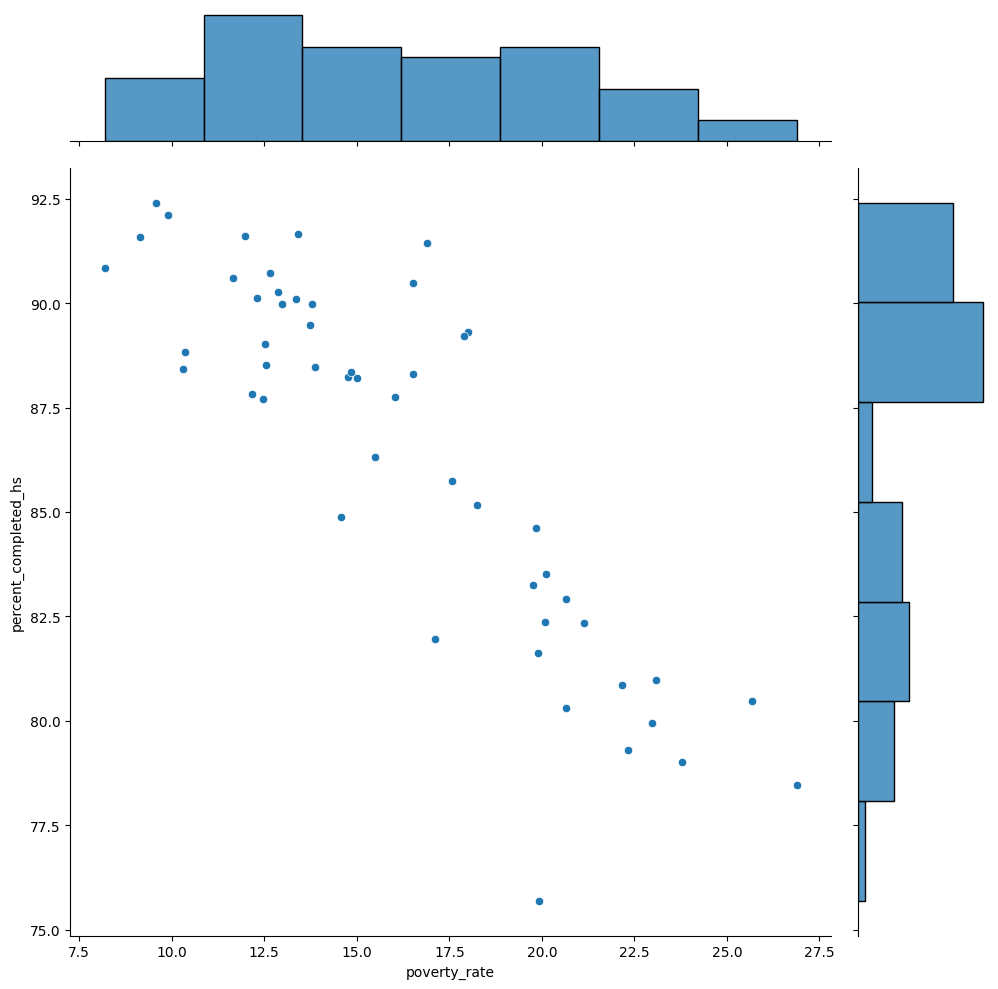

In [22]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_poverty_graduation, kind='kde', height=10)
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=df_poverty_graduation, kind='scatter', height=10)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [23]:
df_poverty_graduation.isna().sum()

Geographic Area_x       0
poverty_rate            0
State                   0
Geographic Area_y       0
percent_completed_hs    0
dtype: int64

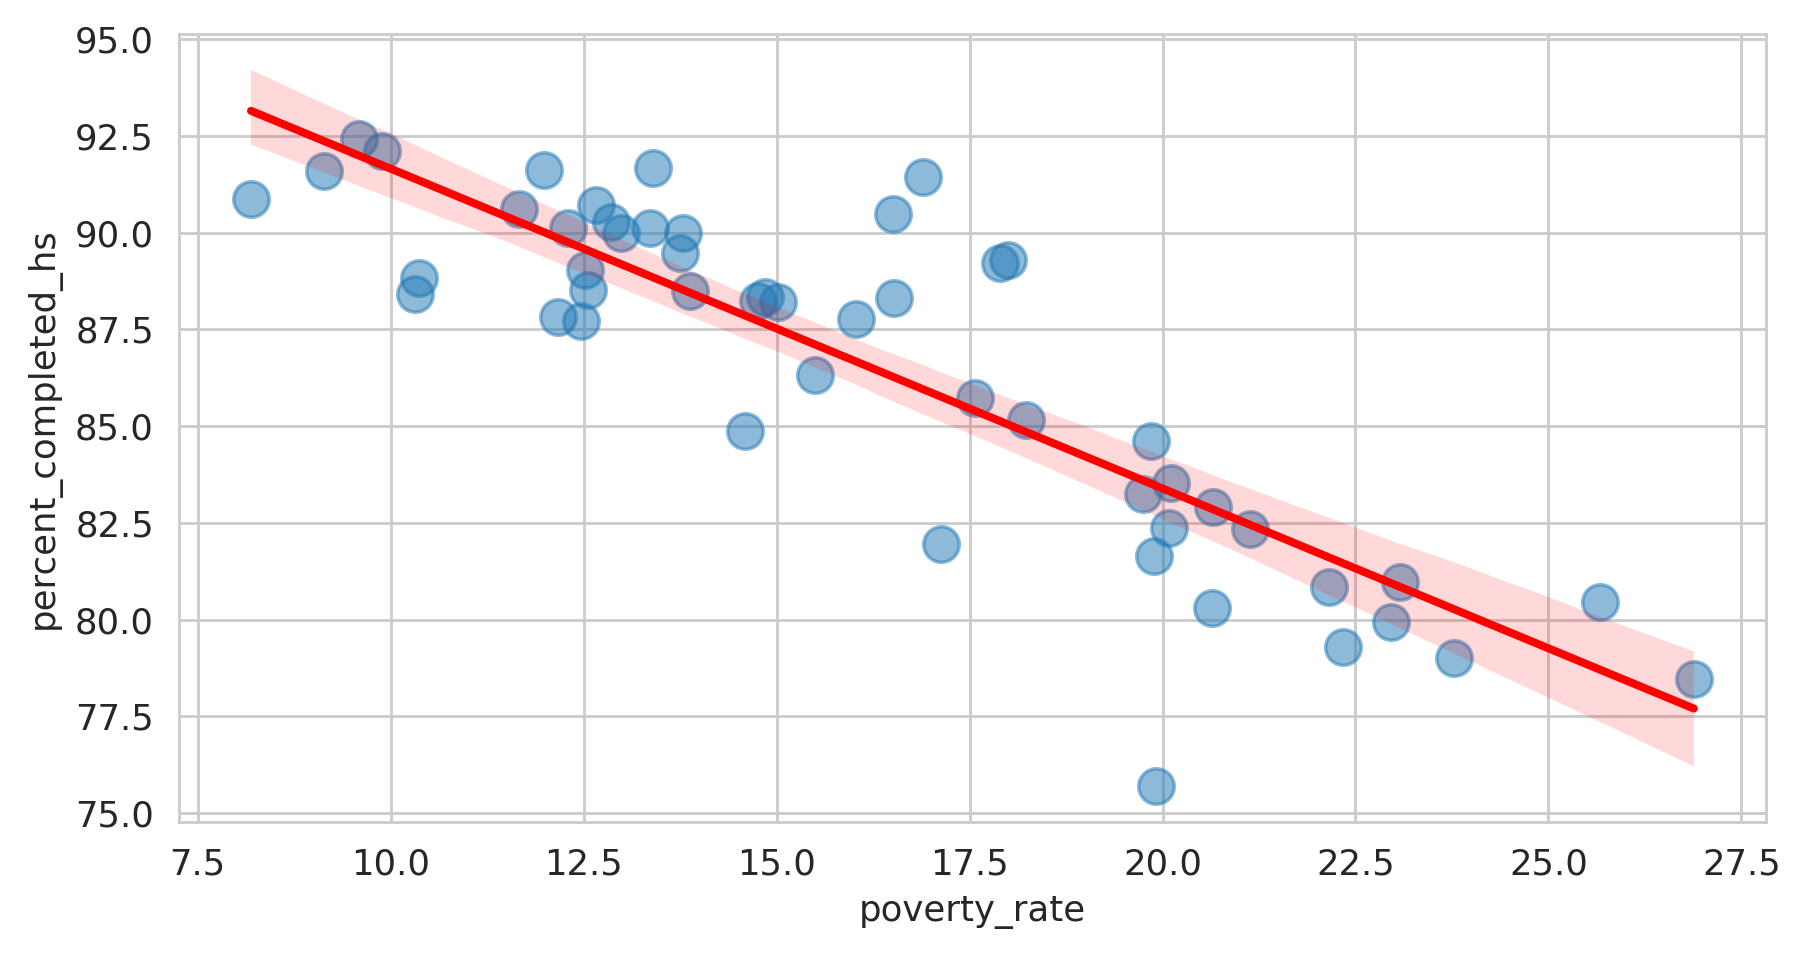

In [24]:
df_poverty_graduation['percent_completed_hs'] = df_poverty_graduation['percent_completed_hs'].astype(float)
df_poverty_graduation['poverty_rate'] = df_poverty_graduation['poverty_rate'].astype(float)
plt.figure(figsize=(8, 4), dpi=256)
with sns.axes_style("whitegrid"):
    axes = sns.regplot(
        data=df_poverty_graduation,
        x="poverty_rate",
        y="percent_completed_hs",
        scatter_kws={"s": 100, "alpha": 0.5},
        line_kws={"color": "red"},
    )
plt.show()

<Figure size 2048x1024 with 0 Axes>

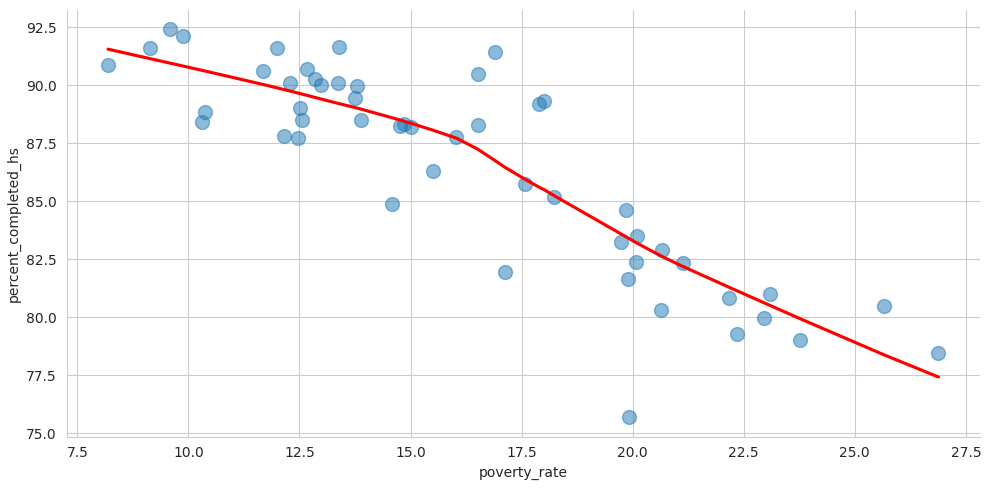

In [25]:
plt.figure(figsize=(8, 4), dpi=256)
with sns.axes_style("whitegrid"):
    axes2 = sns.lmplot(
        data=df_poverty_graduation,
        x="poverty_rate",
        y="percent_completed_hs",
        scatter_kws={"s": 100, "alpha": 0.5},
        line_kws={"color": "red"},
        aspect=2,
        lowess=True,
    )
plt.show()

# <b style="color: orangered"> New Section </b>

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [26]:
def check_numeric(value: str):
    try:
        float(value)
        return True
    except ValueError:
        return False
df_share_race_city = df_share_race_city[-df_share_race_city['share_white'].apply(check_numeric) == False].copy()

In [27]:
df_share_race_city["Geographic area"] = df_share_race_city["Geographic area"].astype(str)
df_share_race_city["City"] = df_share_race_city["City"].astype(str)
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"])
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"])
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"])
df_share_race_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [28]:
race_by_state = df_share_race_city.groupby("Geographic area").agg({'share_white': 'sum', 'share_black': 'sum', 'share_native_american': 'sum', 'share_asian': 'sum', 'share_hispanic': 'sum'}).reset_index()
race_by_state["State"] = race_by_state["Geographic area"].apply(get_state_name)

def get_percentage(row):
    sum = row['share_white'] + row['share_black'] + row['share_native_american'] + row['share_asian'] + row['share_hispanic']
    row['share_white'] = round(row['share_white'] * 100 / sum, 2)
    row['share_black'] = round(row['share_black'] * 100 / sum, 2)
    row['share_native_american'] = round(row['share_native_american'] * 100 / sum, 2)
    row['share_asian'] = round(row['share_asian'] * 100 / sum, 2)
    row['share_hispanic'] = round(row['share_hispanic'] * 100 / sum, 2)
    return row

race_by_state = race_by_state.apply(get_percentage, axis=1)
race_by_state

'NoneType' object has no attribute 'name'


,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic,State
0,AK,47.74,0.59,47.97,1.45,2.25,Alaska
1,AL,72.54,23.33,0.66,0.48,2.98,Alabama
2,AR,78.25,16.26,0.76,0.48,4.26,Arkansas
3,AZ,54.31,0.87,25.91,0.66,18.26,Arizona
4,CA,64.45,2.41,1.55,4.99,26.59,California
5,CO,80.25,0.84,1.49,1.06,16.37,Colorado
6,CT,83.83,4.86,0.64,2.91,7.76,Connecticut
7,DC,37.71,49.66,0.29,3.43,8.91,DC
8,DE,75.06,15.15,0.52,1.97,7.30,Delaware
9,FL,71.10,12.08,0.41,1.46,14.94,Florida


In [29]:
races_dist = px.bar(race_by_state, x="State", y=["share_white", "share_black", "share_hispanic", "share_asian", "share_native_american"], title="Race distribution" )
races_dist.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [30]:

killed_by_race = df_fatalities["race"]
killed_by_race.dropna(inplace=True)
killed_by_race.replace({"A": "Asian", "B": "Black", "H": "Hispanic", "N": "Native American", "O": "Other", "W": "White"}, inplace=True)

In [31]:
killed_by_race = killed_by_race.value_counts()
killed_by_race

race
White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Other                28
Name: count, dtype: int64

In [32]:
donut = px.pie(killed_by_race, values=killed_by_race.values, names=killed_by_race.index, hole=0.60)
donut.update_traces(textposition='outside', textinfo='percent+label')
donut.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [33]:
fatalities_by_gender = df_fatalities["gender"]
fatalities_by_gender.replace({"M": "Male", "F": "Female"}, inplace=True)
fatalities_by_gender = fatalities_by_gender.value_counts()

In [34]:
by_gender_bar = px.bar(fatalities_by_gender, x=fatalities_by_gender.index, y=fatalities_by_gender.values)
by_gender_bar.update_layout(xaxis_title="Gender", yaxis_title="Number of Fatalities")
by_gender_bar.show()

In [35]:
by_gender_pie = px.pie(fatalities_by_gender, values=fatalities_by_gender.values, names=fatalities_by_gender.index, hole=0.7)
by_gender_pie.update_traces(textposition='outside', textinfo='percent+label')
by_gender_pie.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [36]:
by_age_data = df_fatalities[["age", "gender", "manner_of_death"]].copy()
by_age_data.dropna(inplace=True)
by_age_data["age"] = pd.to_numeric(by_age_data["age"])

In [37]:
age_and_manner_of_death = px.box(by_age_data, x="manner_of_death", y="age")
age_and_manner_of_death.update_layout(xaxis_title="Manner of Death", yaxis_title="Age")
age_and_manner_of_death.show()

In [38]:
analysis_by_gender = px.box(by_age_data, x="manner_of_death", y="age", color="gender")
analysis_by_gender.update_layout(xaxis_title="Manner of Death", yaxis_title="Age")
analysis_by_gender.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [40]:
armed = df_fatalities["armed"]
armed.dropna(inplace=True)
armed = armed.value_counts()

In [42]:
by_arm_bar = px.bar(armed, x=armed.index, y=armed.values)
by_arm_bar.update_layout(xaxis_title="Armed", yaxis_title="Number of Fatalities")
by_arm_bar.update_yaxes(type="log")
by_arm_bar.show()

In [53]:
armed = armed[armed.index.isin(["gun", "unarmed"])]
gun_unarmed = px.pie(armed, values=armed.values, names=armed.index)
gun_unarmed.update_traces(textposition='outside', textinfo='label+value')
gun_unarmed.show()